In [1]:
# Importation des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# data visualization

# Les données
Les données sont disponibles sur ce lien et sont constituées de 5 fichiers:

fr_animaux.csv : multiples indicateurs de production des produits animaux en 2013

fr_population.csv: population mondiale par pays en 2013

fr_vegetaux.csv: multiples indicateurs de production des produits végétaux en 2013

fr_céréales.csv: quantité de céréales produites au niveau mondial en 2013    

fr_sousalimentation.csv: nombre de personnes sous alimentées dans le monde de 2013 à 2017.


In [2]:
df_animaux = pd.read_csv('fr_animaux.csv')
df_cereales = pd.read_csv('fr_céréales.csv')
df_sousalimentation = pd.read_csv('fr_sousalimentation.csv')
df_vegetaux = pd.read_csv('fr_vegetaux.csv')
df_population= pd.read_csv('fr_population.csv')

In [4]:
df_population.columns.to_list()

['Code Domaine',
 'Domaine',
 'Code zone',
 'Zone',
 'Code Élément',
 'Élément',
 'Code Produit',
 'Produit',
 'Code année',
 'Année',
 'Unité',
 'Valeur',
 'Symbole',
 'Description du Symbole']

In [5]:
df_animaux.columns.to_list()

['Code Domaine',
 'Domaine',
 'Code zone',
 'Zone',
 'Code Élément',
 'Élément',
 'Code Produit',
 'Produit',
 'Code année',
 'Année',
 'Unité',
 'Valeur',
 'Symbole',
 'Description du Symbole']

In [6]:
df_sousalimentation.columns.to_list()

['Code Domaine',
 'Domaine',
 'Code zone',
 'Zone',
 'Code Élément',
 'Élément',
 'Code Produit',
 'Produit',
 'Code année',
 'Année',
 'Unité',
 'Valeur',
 'Symbole',
 'Description du Symbole',
 'Note']

In [7]:
df_vegetaux.columns.to_list()

['Code Domaine',
 'Domaine',
 'Code zone',
 'Zone',
 'Code Élément',
 'Élément',
 'Code Produit',
 'Produit',
 'Code année',
 'Année',
 'Unité',
 'Valeur',
 'Symbole',
 'Description du Symbole']

In [8]:
df_cereales.columns.to_list()

['Sum of Valeur', 'Unnamed: 1', 'Unnamed: 2']

In [9]:
df_cereales.columns = df_cereales.iloc[0]
df_cereales = df_cereales[1:]

In [10]:
df_cereales.columns.to_list()

['Zone', 'Produit', 'Total']

# Question_1: Calculate the total number of humans on the planet.

In [11]:
df_population.head(2)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,511,Population totale,2501,Population,2013,2013,1000 personnes,30552,NaN,Donnée officielle
1,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,202,Afrique du Sud,511,Population totale,2501,Population,2013,2013,1000 personnes,52776,NaN,Donnée officielle


In [12]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 14 columns):
Code Domaine              175 non-null object
Domaine                   175 non-null object
Code zone                 175 non-null int64
Zone                      175 non-null object
Code Élément              175 non-null int64
Élément                   175 non-null object
Code Produit              175 non-null int64
Produit                   175 non-null object
Code année                175 non-null int64
Année                     175 non-null int64
Unité                     175 non-null object
Valeur                    175 non-null int64
Symbole                   1 non-null object
Description du Symbole    175 non-null object
dtypes: int64(6), object(8)
memory usage: 19.3+ KB


In [13]:
df_population.Année.unique()
#df.Élément.value_counts()

array([2013], dtype=int64)

In [14]:
df_population.Symbole.unique()

array([nan, 'A'], dtype=object)

In [15]:
# I have check the population data in excel, 
# there are different regions of chine in the data and one combined row for popluation.
# so for now remove the combined row for population and keep the population for different regions. (Removed Symbol A)

In [16]:
# Before removing Chine combined population( symbol A)
df_population.Valeur.sum()

8413993

In [17]:
# As per the internet research, world Population 2013 was 7210581976 (7.2 Billions)
# But In the data it is showing 8413993 (8.4 Billions)

In [18]:
#After Removing symbol A value
df_population.pivot_table('Valeur', index='Description du Symbole', columns='Symbole', aggfunc='sum')

Symbole,A
Description du Symbole,
"Agrégat, peut inclure des données officielles, semi-officielles, estimées ou calculées",1416667


In [19]:
population_2013=(df_population[df_population.Symbole!='A'].Valeur.sum()*1000)
population_2013

6997326000

In [20]:
print('La population mondiale en 2013 est de', '{:,}'.format(population_2013).replace(',', ' '), 'habitants (6.9 Billions).')

La population mondiale en 2013 est de 6 997 326 000 habitants (6.9 Billions).


In [21]:
population_2013_df= pd.DataFrame(df_population, columns = ['Zone','Valeur'])
population_2013_df.head()

,Zone,Valeur
0,Afghanistan,30552
1,Afrique du Sud,52776
2,Albanie,3173
3,Algérie,39208
4,Allemagne,82727


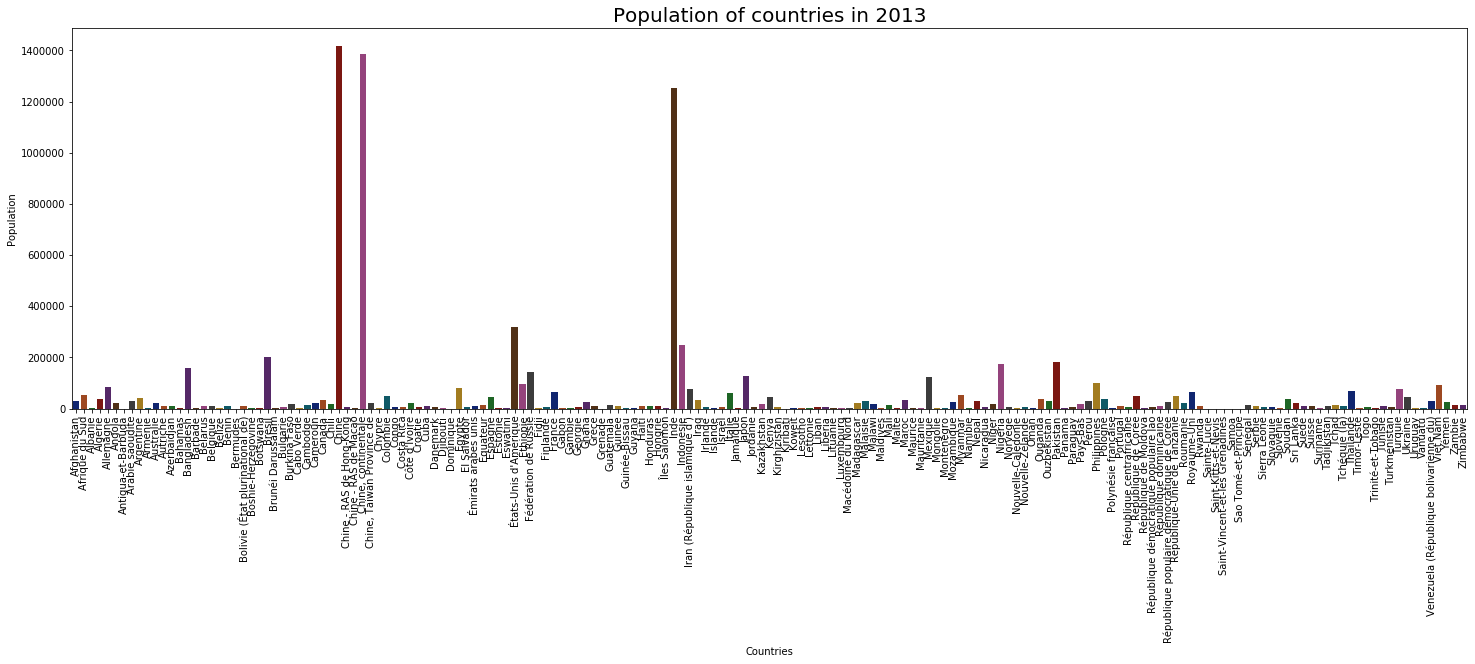

In [22]:
plt.rcParams['figure.figsize'] = (25, 7)
ax = sns.barplot(x = 'Zone', y = 'Valeur', data=df_population, palette = 'dark')
ax.set_xlabel(xlabel = 'Countries', fontsize = 10)
ax.set_ylabel(ylabel = 'Population', fontsize = 10)
ax.set_title(label = 'Population of countries in 2013', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

# Question 2 : Identifiez ces redondances, en donnant votre réponse sous forme de formule mathématique.

Production 

Importations

Exportations

Variation de stock

Disponibilité intérieure

Semences

Pertes

Nourriture, aussi appelée Disponibilité alimentaire

Aliments pour animaux

Traitement

Autres utilisations 

C'est une équation à 3 termes de type (a_1 + a2 + [...] = b_1 + b_2 + [...] = c_1 + c_2 + [...]) ) faisant intervenir chacune des 11 quantités données.

Disponibilité intérieur = Production + importations - exportations + variations des stocks = Nourriture + Aliments pour animaux + Semences + Traitement + Autres utilisations + Pertes

In [23]:
#Create a dataframe "France-Ble" for verify the data.
df_ble_france = df_vegetaux[(df_vegetaux['Zone'] == 'France')  & (df_vegetaux['Produit'] == 'Blé')]
df_ble_france.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
37487,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,68,France,5511,Production,2511,Blé,2013,2013,Milliers de tonnes,38614.0,S,Données standardisées
37488,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,68,France,5611,Importations - Quantité,2511,Blé,2013,2013,Milliers de tonnes,2055.0,S,Données standardisées
37489,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,68,France,5072,Variation de stock,2511,Blé,2013,2013,Milliers de tonnes,1131.0,S,Données standardisées
37490,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,68,France,5911,Exportations - Quantité,2511,Blé,2013,2013,Milliers de tonnes,21502.0,S,Données standardisées
37491,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,68,France,5301,Disponibilité intérieure,2511,Blé,2013,2013,Milliers de tonnes,20298.0,S,Données standardisées


In [24]:
#First equation: Disponibilité intérieur
df_ble_france[df_ble_france['Élément']=='Disponibilité intérieure'].Valeur

37491    20298.0
Name: Valeur, dtype: float64

In [25]:
#Second equation: Production + importations - exportations + variations des stocks
Disponibilité_intérieur=(int(df_ble_france[df_ble_france['Code Élément'] == 5511].Valeur) 
                   + int(df_ble_france[df_ble_france['Code Élément'] == 5611].Valeur) 
                   - int(df_ble_france[df_ble_france['Code Élément'] == 5911].Valeur) 
                   + int(df_ble_france[df_ble_france['Code Élément'] == 5072].Valeur))
Disponibilité_intérieur

20298

In [26]:
# Third equation: Nourriture + Aliments pour animaux + Semences + Traitement + Autres utilisations + Pertes
Disponibilité_intérieur_2 = (int(df_ble_france[df_ble_france['Code Élément'] == 5142].Valeur) 
                    + int(df_ble_france[df_ble_france['Code Élément'] == 5521].Valeur) 
                    + int(df_ble_france[df_ble_france['Code Élément'] == 5527].Valeur) 
                    + int(df_ble_france[df_ble_france['Code Élément'] == 5131].Valeur)
                    + int(df_ble_france[df_ble_france['Code Élément'] == 5154].Valeur)
                    + int(df_ble_france[df_ble_france['Code Élément'] == 5123].Valeur))
Disponibilité_intérieur_2

20298

# Question 3 : Calculez (pour chaque pays et chaque produit) la disponibilité alimentaire en kcal puis en kg de protéines.

In [27]:
df_animaux.head(2)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5511,Production,2731,Viande de Bovins,2013,2013,Milliers de tonnes,134.0,S,Données standardisées
1,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5611,Importations - Quantité,2731,Viande de Bovins,2013,2013,Milliers de tonnes,6.0,S,Données standardisées


In [28]:
print('df_vegetaux', df_vegetaux.columns.to_list())
print('df_animaux', df_animaux.columns.to_list())

df_vegetaux ['Code Domaine', 'Domaine', 'Code zone', 'Zone', 'Code Élément', 'Élément', 'Code Produit', 'Produit', 'Code année', 'Année', 'Unité', 'Valeur', 'Symbole', 'Description du Symbole']
df_animaux ['Code Domaine', 'Domaine', 'Code zone', 'Zone', 'Code Élément', 'Élément', 'Code Produit', 'Produit', 'Code année', 'Année', 'Unité', 'Valeur', 'Symbole', 'Description du Symbole']


In [29]:
# As the all columns are same in both the data, so create one column origine for products
df_animaux['origine'] = 'Animal'
df_vegetaux['origine'] = 'Vegetal'

In [30]:
df_vegetaux.head(2)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,origine
0,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5511,Production,2511,Blé,2013,2013,Milliers de tonnes,5169.0,S,Données standardisées,Vegetal
1,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5611,Importations - Quantité,2511,Blé,2013,2013,Milliers de tonnes,1173.0,S,Données standardisées,Vegetal


In [31]:
df_sousalimentation.head(2)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,2,Afghanistan,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20122014,2012-2014,millions,7.9,F,Estimation FAO,NaN
1,FS,Données de la sécurité alimentaire,2,Afghanistan,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20132015,2013-2015,millions,8.8,F,Estimation FAO,NaN


In [32]:
df_cereales.head(2)

,Zone,Produit,Total
1,Égypte,Blé,9460
2,NaN,Maïs,7957


In [33]:
# Now, append animaux data in to vegetaux 
df_alimentaire=df_animaux.append(df_vegetaux)
df_alimentaire.head(30)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,origine
0,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5511,Production,2731,Viande de Bovins,2013,2013,Milliers de tonnes,134.00,S,Données standardisées,Animal
1,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5611,Importations - Quantité,2731,Viande de Bovins,2013,2013,Milliers de tonnes,6.00,S,Données standardisées,Animal
2,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5301,Disponibilité intérieure,2731,Viande de Bovins,2013,2013,Milliers de tonnes,140.00,S,Données standardisées,Animal
3,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5142,Nourriture,2731,Viande de Bovins,2013,2013,Milliers de tonnes,140.00,S,Données standardisées,Animal
4,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,645,Disponibilité alimentaire en quantité (kg/pers...,2731,Viande de Bovins,2013,2013,kg,4.59,Fc,Donnée calculée,Animal
5,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2731,Viande de Bovins,2013,2013,Kcal/personne/jour,27.00,Fc,Donnée calculée,Animal
6,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2731,Viande de Bovins,2013,2013,g/personne/jour,1.89,Fc,Donnée calculée,Animal
7,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,684,Disponibilité de matière grasse en quantité (g...,2731,Viande de Bovins,2013,2013,g/personne/jour,2.10,Fc,Donnée calculée,Animal
8,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5511,Production,2732,Viande d'Ovins/Caprins,2013,2013,Milliers de tonnes,150.00,S,Données standardisées,Animal
9,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5301,Disponibilité intérieure,2732,Viande d'Ovins/Caprins,2013,2013,Milliers de tonnes,150.00,S,Données standardisées,Animal


In [34]:
# Then, merge table
df_alimentaire=pd.merge(df_alimentaire,df_population,on='Code zone')
df_alimentaire.head(2)

,Code Domaine_x,Domaine_x,Code zone,Zone_x,Code Élément_x,Élément_x,Code Produit_x,Produit_x,Code année_x,Année_x,...,Code Élément_y,Élément_y,Code Produit_y,Produit_y,Code année_y,Année_y,Unité_y,Valeur_y,Symbole_y,Description du Symbole_y
0,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5511,Production,2731,Viande de Bovins,2013,2013,...,511,Population totale,2501,Population,2013,2013,1000 personnes,30552,NaN,Donnée officielle
1,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5611,Importations - Quantité,2731,Viande de Bovins,2013,2013,...,511,Population totale,2501,Population,2013,2013,1000 personnes,30552,NaN,Donnée officielle


In [35]:
# take columns
df_alimentaire = df_alimentaire[['Code Domaine_x', 'Domaine_x', 'Code zone', 'Zone_x', 'Code Élément_x',
       'Élément_x', 'Code Produit_x', 'Produit_x', 'Année_x',
       'Unité_x', 'Valeur_x','origine', 'Valeur_y']]

In [36]:
#rename columns:
df_alimentaire = df_alimentaire.rename(columns = {'Code Domaine_x':'Code Domaine', 'Domaine_x':'Domaine', 
                                                             'Zone_x':'Zone', 'Code Élément_x':'Code Élément', 
                                                             'Élément_x':'Élément', 'Code Produit_x':'Code Produit',
                                                             'Produit_x':'Produit', 'Année_x':'Année', 'Unité_x':'Unité',
                                                             'Valeur_x':'Valeur', 'Valeur_y':'Population'})
df_alimentaire.head(2)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Année,Unité,Valeur,origine,Population
0,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5511,Production,2731,Viande de Bovins,2013,Milliers de tonnes,134.0,Animal,30552
1,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5611,Importations - Quantité,2731,Viande de Bovins,2013,Milliers de tonnes,6.0,Animal,30552


In [37]:
df_alimentaire.head(20)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Année,Unité,Valeur,origine,Population
0,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5511,Production,2731,Viande de Bovins,2013,Milliers de tonnes,134.00,Animal,30552
1,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5611,Importations - Quantité,2731,Viande de Bovins,2013,Milliers de tonnes,6.00,Animal,30552
2,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5301,Disponibilité intérieure,2731,Viande de Bovins,2013,Milliers de tonnes,140.00,Animal,30552
3,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5142,Nourriture,2731,Viande de Bovins,2013,Milliers de tonnes,140.00,Animal,30552
4,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,645,Disponibilité alimentaire en quantité (kg/pers...,2731,Viande de Bovins,2013,kg,4.59,Animal,30552
5,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2731,Viande de Bovins,2013,Kcal/personne/jour,27.00,Animal,30552
6,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2731,Viande de Bovins,2013,g/personne/jour,1.89,Animal,30552
7,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,684,Disponibilité de matière grasse en quantité (g...,2731,Viande de Bovins,2013,g/personne/jour,2.10,Animal,30552
8,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5511,Production,2732,Viande d'Ovins/Caprins,2013,Milliers de tonnes,150.00,Animal,30552
9,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5301,Disponibilité intérieure,2732,Viande d'Ovins/Caprins,2013,Milliers de tonnes,150.00,Animal,30552


In [38]:
#Pivot_table pour resultant:

df_alimentaire = df_alimentaire.pivot_table(index = ['Code zone','Zone','Code Produit','Produit','Année','origine','Population'],
                                                       columns = 'Élément', values = 'Valeur', aggfunc = sum).reset_index()

In [39]:
df_alimentaire.head(20)

Élément,Code zone,Zone,Code Produit,Produit,Année,origine,Population,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),...,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,1,Arménie,2511,Blé,2013,Vegetal,2977,93.0,0.0,1024.0,...,30.52,554.0,1.0,361.0,389.0,32.0,312.0,30.0,10.0,-118.0
1,1,Arménie,2513,Orge,2013,Vegetal,2977,137.0,26.0,0.0,...,0.00,198.0,0.0,9.0,0.0,15.0,189.0,14.0,7.0,0.0
2,1,Arménie,2514,Maïs,2013,Vegetal,2977,96.0,NaN,0.0,...,0.01,102.0,NaN,82.0,0.0,7.0,21.0,0.0,NaN,NaN
3,1,Arménie,2515,Seigle,2013,Vegetal,2977,1.0,NaN,1.0,...,0.02,1.0,NaN,0.0,0.0,0.0,1.0,0.0,NaN,0.0
4,1,Arménie,2516,Avoine,2013,Vegetal,2977,4.0,NaN,2.0,...,0.09,6.0,NaN,1.0,1.0,0.0,5.0,0.0,NaN,NaN
5,1,Arménie,2517,Millet,2013,Vegetal,2977,0.0,NaN,NaN,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6,1,Arménie,2518,Sorgho,2013,Vegetal,2977,0.0,NaN,NaN,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7,1,Arménie,2520,"Céréales, Autres",2013,Vegetal,2977,1.0,12.0,14.0,...,0.39,21.0,0.0,4.0,6.0,1.0,17.0,1.0,NaN,0.0
8,1,Arménie,2531,Pommes de Terre,2013,Vegetal,2977,225.0,16.0,82.0,...,1.94,672.0,9.0,5.0,134.0,96.0,661.0,123.0,78.0,15.0
9,1,Arménie,2532,Manioc,2013,Vegetal,2977,0.0,NaN,NaN,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# Calculs des disponibilités alimentaires totales par produit pour chaque pays, en Kcal et en Kg
df_alimentaire['Disponibilité alimentaire totale (Kcal)'] = ((df_alimentaire['Population'] * 1000)
                                                                    * df_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)']
                                                                    * 365)
  

In [41]:
df_alimentaire['Disponibilité alimentaire protéines totale (Kg)'] = ((df_alimentaire['Population'] * 1000)
                                                                    * (df_alimentaire['Disponibilité de protéines en quantité (g/personne/jour)']/1000)
                                                                    * 365)

df_alimentaire.head() 

Élément,Code zone,Zone,Code Produit,Produit,Année,origine,Population,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),...,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Disponibilité alimentaire totale (Kcal),Disponibilité alimentaire protéines totale (Kg)
0,1,Arménie,2511,Blé,2013,Vegetal,2977,93.0,0.0,1024.0,...,1.0,361.0,389.0,32.0,312.0,30.0,10.0,-118.0,1.112684e+12,33163184.60
1,1,Arménie,2513,Orge,2013,Vegetal,2977,137.0,26.0,0.0,...,0.0,9.0,0.0,15.0,189.0,14.0,7.0,0.0,0.000000e+00,0.00
2,1,Arménie,2514,Maïs,2013,Vegetal,2977,96.0,NaN,0.0,...,NaN,82.0,0.0,7.0,21.0,0.0,NaN,NaN,0.000000e+00,10866.05
3,1,Arménie,2515,Seigle,2013,Vegetal,2977,1.0,NaN,1.0,...,NaN,0.0,0.0,0.0,1.0,0.0,NaN,0.0,1.086605e+09,21732.10
4,1,Arménie,2516,Avoine,2013,Vegetal,2977,4.0,NaN,2.0,...,NaN,1.0,1.0,0.0,5.0,0.0,NaN,NaN,2.173210e+09,97794.45


# Question 4 : A partir de ces dernières informations, et à partir du poids de la disponibilité alimentaire (pour chaque pays et chaque produit), calculez pour chaque produit le ratio "énergie/poids", que vous donnerez en kcal/kg. Vous pouvez vérifier la cohérence de votre calcul en comparant ce ratio aux données disponibles sur internet, par exemple en cherchant la valeur calorique d'un oeuf.

In [42]:
#import numpy as np

In [43]:
# Create new column in df_alimentaire for calculate ratio energie/poids(Kcal/Kg)
df_alimentaire['Ratio énergie/poids (kcal/kg)']=(df_alimentaire['Disponibilité alimentaire totale (Kcal)']/
                                                       (df_alimentaire['Nourriture']*1000000))
df_alimentaire.head(3)

Élément,Code zone,Zone,Code Produit,Produit,Année,origine,Population,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Disponibilité alimentaire totale (Kcal),Disponibilité alimentaire protéines totale (Kg),Ratio énergie/poids (kcal/kg)
0,1,Arménie,2511,Blé,2013,Vegetal,2977,93.0,0.0,1024.0,...,361.0,389.0,32.0,312.0,30.0,10.0,-118.0,1.112684e+12,33163184.60,2860.368946
1,1,Arménie,2513,Orge,2013,Vegetal,2977,137.0,26.0,0.0,...,9.0,0.0,15.0,189.0,14.0,7.0,0.0,0.000000e+00,0.00,NaN
2,1,Arménie,2514,Maïs,2013,Vegetal,2977,96.0,NaN,0.0,...,82.0,0.0,7.0,21.0,0.0,NaN,NaN,0.000000e+00,10866.05,NaN


In [44]:
#You can check the consistency of your calculation by comparing this ratio to data available on the internet, 
#for example by searching for the caloric value of an egg.
df_alimentaire[df_alimentaire['Produit']=='Oeufs']


Élément,Code zone,Zone,Code Produit,Produit,Année,origine,Population,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Disponibilité alimentaire totale (Kcal),Disponibilité alimentaire protéines totale (Kg),Ratio énergie/poids (kcal/kg)
74,1,Arménie,2744,Oeufs,2013,Animal,2977,NaN,0.0,45.0,...,1.0,35.0,NaN,34.0,0.0,NaN,NaN,4.889722e+10,3.727055e+06,1397.063571
144,2,Afghanistan,2744,Oeufs,2013,Animal,30552,NaN,NaN,5.0,...,29.0,40.0,5.0,18.0,2.0,NaN,NaN,5.575740e+10,4.237562e+06,1393.935000
226,3,Albanie,2744,Oeufs,2013,Animal,3173,NaN,NaN,46.0,...,0.0,40.0,7.0,48.0,0.0,NaN,NaN,5.327467e+10,4.227229e+06,1331.866750
319,4,Algérie,2744,Oeufs,2013,Animal,39208,NaN,NaN,27.0,...,0.0,316.0,10.0,347.0,21.0,NaN,NaN,3.863948e+11,3.291512e+07,1222.768481
400,7,Angola,2744,Oeufs,2013,Animal,21472,NaN,NaN,4.0,...,24.0,24.0,2.0,5.0,3.0,NaN,NaN,3.134912e+10,2.586302e+06,1306.213333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15324,256,Luxembourg,2744,Oeufs,2013,Animal,530,NaN,NaN,55.0,...,7.0,8.0,NaN,2.0,0.0,NaN,0.0,1.063975e+10,8.221625e+05,1329.968750
15416,272,Serbie,2744,Oeufs,2013,Animal,9511,NaN,NaN,34.0,...,2.0,85.0,NaN,88.0,4.0,NaN,NaN,1.180315e+11,9.060654e+06,1388.606000
15506,273,Monténégro,2744,Oeufs,2013,Animal,621,NaN,NaN,44.0,...,3.0,7.0,NaN,4.0,0.0,NaN,NaN,9.973260e+09,7.706610e+05,1424.751429
15596,276,Soudan,2744,Oeufs,2013,Animal,37964,NaN,NaN,4.0,...,1.0,38.0,NaN,40.0,4.0,NaN,NaN,5.542744e+10,4.018489e+06,1458.616842


In [45]:
# For Protein
df_alimentaire['Pourcentage de protéines produit'] = (df_alimentaire['Disponibilité alimentaire protéines totale (Kg)']
                                                            / (df_alimentaire['Nourriture'] * 1000000))*100
df_alimentaire.head(2)

Élément,Code zone,Zone,Code Produit,Produit,Année,origine,Population,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),...,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Disponibilité alimentaire totale (Kcal),Disponibilité alimentaire protéines totale (Kg),Ratio énergie/poids (kcal/kg),Pourcentage de protéines produit
0,1,Arménie,2511,Blé,2013,Vegetal,2977,93.0,0.0,1024.0,...,389.0,32.0,312.0,30.0,10.0,-118.0,1.112684e+12,33163184.6,2860.368946,8.52524
1,1,Arménie,2513,Orge,2013,Vegetal,2977,137.0,26.0,0.0,...,0.0,15.0,189.0,14.0,7.0,0.0,0.000000e+00,0.0,NaN,NaN


In [46]:
df_alimentaire[df_alimentaire['Produit']=='Avoine']

Élément,Code zone,Zone,Code Produit,Produit,Année,origine,Population,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),...,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Disponibilité alimentaire totale (Kcal),Disponibilité alimentaire protéines totale (Kg),Ratio énergie/poids (kcal/kg),Pourcentage de protéines produit
4,1,Arménie,2516,Avoine,2013,Vegetal,2977,4.0,NaN,2.0,...,1.0,0.0,5.0,0.0,NaN,NaN,2.173210e+09,97794.45,2173.210000,9.779445
154,3,Albanie,2516,Avoine,2013,Vegetal,3173,25.0,NaN,1.0,...,0.0,1.0,27.0,1.0,NaN,NaN,1.158145e+09,34744.35,inf,inf
246,4,Algérie,2516,Avoine,2013,Vegetal,39208,107.0,NaN,0.0,...,0.0,6.0,113.0,8.0,NaN,0.0,0.000000e+00,0.00,NaN,NaN
338,7,Angola,2516,Avoine,2013,Vegetal,21472,0.0,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.000000e+00,0.00,NaN,NaN
419,8,Antigua-et-Barbuda,2516,Avoine,2013,Vegetal,90,0.0,NaN,15.0,...,0.0,NaN,NaN,NaN,NaN,0.0,4.927500e+08,21024.00,inf,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15251,256,Luxembourg,2516,Avoine,2013,Vegetal,530,3.0,NaN,9.0,...,1.0,NaN,6.0,0.0,NaN,0.0,1.741050e+09,71576.50,1741.050000,7.157650
15344,272,Serbie,2516,Avoine,2013,Vegetal,9511,84.0,NaN,1.0,...,1.0,1.0,88.0,4.0,NaN,NaN,3.471515e+09,138860.60,3471.515000,13.886060
15436,273,Monténégro,2516,Avoine,2013,Vegetal,621,1.0,NaN,0.0,...,0.0,0.0,1.0,0.0,NaN,NaN,0.000000e+00,NaN,NaN,NaN
15524,276,Soudan,2516,Avoine,2013,Vegetal,37964,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN


# Question 5 : Citez 5 aliments parmi les 20 aliments les plus caloriques, en utilisant le ratio énergie/poids.
Étonnamment, il arrive que ce ratio soit différent en fonction du pays. Il faudra donc réaliser pour chaque aliment une moyenne sur les différents pays. Vous créerez donc une nouvelle table grâce à une agrégation. Attention à bien retirer les valeurs égales à 0 afin de ne pas fausser le calcul de la moyenne.
Citez 5 aliments parmi les 20 aliments les plus riches en protéines.

In [51]:
# Nettoyage des inf et NaN dans le DataFrame en les plaçant à 0

In [52]:
df_alimentaire.loc[~np.isfinite(df_alimentaire['Ratio énergie/poids (kcal/kg)']), 'Ratio énergie/poids (kcal/kg)'] = 0
df_alimentaire.loc[~np.isfinite(df_alimentaire['Pourcentage de protéines produit']), 'Pourcentage de protéines produit'] = 0
df_alimentaire['Ratio énergie/poids (kcal/kg)'].fillna(0)
df_alimentaire['Pourcentage de protéines produit'].fillna(0)

0        8.525240
1        0.000000
2        0.000000
3        0.000000
4        9.779445
           ...   
15697    0.000000
15698    0.000000
15699    6.819045
15700    3.431897
15701    0.000000
Name: Pourcentage de protéines produit, Length: 15702, dtype: float64

In [53]:
df_alimentaire

Élément,Code zone,Zone,Code Produit,Produit,Année,origine,Population,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),...,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Disponibilité alimentaire totale (Kcal),Disponibilité alimentaire protéines totale (Kg),Ratio énergie/poids (kcal/kg),Pourcentage de protéines produit
0,1,Arménie,2511,Blé,2013,Vegetal,2977,93.0,0.0,1024.0,...,389.0,32.0,312.0,30.0,10.0,-118.0,1.112684e+12,3.316318e+07,2860.368946,8.525240
1,1,Arménie,2513,Orge,2013,Vegetal,2977,137.0,26.0,0.0,...,0.0,15.0,189.0,14.0,7.0,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000
2,1,Arménie,2514,Maïs,2013,Vegetal,2977,96.0,NaN,0.0,...,0.0,7.0,21.0,0.0,NaN,NaN,0.000000e+00,1.086605e+04,0.000000,0.000000
3,1,Arménie,2515,Seigle,2013,Vegetal,2977,1.0,NaN,1.0,...,0.0,0.0,1.0,0.0,NaN,0.0,1.086605e+09,2.173210e+04,0.000000,0.000000
4,1,Arménie,2516,Avoine,2013,Vegetal,2977,4.0,NaN,2.0,...,1.0,0.0,5.0,0.0,NaN,NaN,2.173210e+09,9.779445e+04,2173.210000,9.779445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15697,351,Chine,2781,Huiles de Poissons,2013,Animal,1416667,47.0,80.0,0.0,...,0.0,NaN,50.0,NaN,NaN,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000
15698,351,Chine,2782,Huiles de Foie de Poisso,2013,Animal,1416667,0.0,0.0,0.0,...,0.0,NaN,0.0,NaN,NaN,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000
15699,351,Chine,2805,Riz (Eq Blanchi),2013,Vegetal,1416667,12117.0,2085.0,797.0,...,109725.0,6406.0,136873.0,4679.0,12.0,-3998.0,4.121155e+14,7.482198e+09,3755.894405,6.819045
15700,351,Chine,2848,Lait - Excl Beurre,2013,Animal,1416667,1632.0,42.0,59.0,...,47009.0,1433.0,40570.0,NaN,0.0,0.0,3.050792e+13,1.613300e+09,648.980490,3.431897


In [54]:
top_aliments= df_alimentaire[df_alimentaire['Ratio énergie/poids (kcal/kg)'] > 0]
top_aliments=top_aliments.groupby('Produit').mean()

In [55]:
top_aliments

Élément,Code zone,Code Produit,Année,Population,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),...,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Disponibilité alimentaire totale (Kcal),Disponibilité alimentaire protéines totale (Kg),Ratio énergie/poids (kcal/kg),Pourcentage de protéines produit
Produit,,,,,,,,,,,,,,,,,,,,,
Abats Comestible,129.043210,2736.0,2013.0,51921.950617,46.043478,17.679245,8.907407,2.857469,0.264506,1.390000,...,127.845679,3.476190,139.944444,NaN,NaN,0.500000,1.415115e+11,2.283434e+07,1129.251060,17.562798
"Agrumes, Autres",138.210526,2614.0,2013.0,96999.421053,NaN,3.000000,3.315789,4.766053,0.022857,0.056053,...,387.921053,25.814815,552.592593,NaN,0.666667,1.812500,9.230957e+10,1.775914e+06,248.414160,0.389879
Aliments pour enfants,128.523810,2680.0,2013.0,51333.666667,NaN,NaN,5.964286,0.587619,0.047024,0.245238,...,10.285714,0.500000,NaN,NaN,NaN,0.000000,3.916480e+10,1.592030e+06,3693.528368,14.956015
Ananas,123.532787,2618.0,2013.0,60403.491803,NaN,0.500000,5.336066,5.248115,0.017207,0.039250,...,183.049180,33.232558,388.552239,NaN,1.600000,6.232143,6.224813e+10,5.006224e+05,438.271722,0.277555
Animaux Aquatiques Autre,164.200000,2769.0,2013.0,585142.400000,NaN,0.000000,1.000000,0.732000,0.006000,0.080000,...,403.200000,NaN,557.250000,0.0,NaN,0.000000,2.135770e+11,1.528230e+07,641.603173,4.363500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viande de Suides,125.493333,2733.0,2013.0,49621.720000,NaN,8.411765,104.140000,16.723733,9.324133,4.638333,...,1111.893333,15.277778,1112.133333,NaN,1.727273,0.561644,3.387074e+12,1.191264e+08,2537.654068,10.279395
Viande de Volailles,126.720000,2734.0,2013.0,48079.960000,0.000000,32.000000,74.822857,20.522286,4.922057,7.128000,...,710.400000,38.500000,736.763006,NaN,12.526316,1.362069,1.048868e+12,8.842343e+07,1303.749307,12.616427
"Viande, Autre",135.734513,2735.0,2013.0,49622.522124,4.777778,1.333333,9.053097,2.675044,0.387257,1.282655,...,72.592920,4.000000,70.431193,NaN,0.368421,0.018868,8.926970e+10,1.292647e+07,1295.194209,17.443161


In [56]:
def top(a,b,c):
    a.sort_values(by=[b], inplace=True, ascending=False)
    return a.head(c)

In [57]:
#top 20 pour séléctionner les 5 premiers ensuite
top(top_aliments,'Ratio énergie/poids (kcal/kg)',20)

Élément,Code zone,Code Produit,Année,Population,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),...,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Disponibilité alimentaire totale (Kcal),Disponibilité alimentaire protéines totale (Kg),Ratio énergie/poids (kcal/kg),Pourcentage de protéines produit
Produit,,,,,,,,,,,,,,,,,,,,,
Huiles de Foie de Poisso,193.000000,2782.0,2013.0,20410.500000,NaN,0.000000,10.000000,0.390000,1.070000,0.000000,...,5.000000,NaN,0.000000,NaN,NaN,0.000000,4.732334e+10,0.000000e+00,9982.932500,0.000000
Huile de Sésame,125.638889,2579.0,2013.0,153437.944444,NaN,47.666667,9.166667,0.375278,1.030278,0.000000,...,26.055556,NaN,38.090909,NaN,1.000000,0.000000,2.364497e+11,0.000000e+00,9421.495035,0.000000
Huile de Son de Riz,137.000000,2581.0,2013.0,373285.538462,NaN,66.000000,7.461538,0.308462,0.829231,0.010000,...,72.846154,NaN,90.538462,NaN,NaN,-16.500000,6.260958e+11,4.640756e+05,9399.062097,0.053281
Huiles de Poissons,77.333333,2781.0,2013.0,65684.666667,21.500000,4.000000,34.000000,1.380000,3.780000,0.000000,...,22.333333,NaN,39.666667,NaN,NaN,0.000000,2.012756e+11,0.000000e+00,9003.715504,0.000000
Huile d'Olive,128.848837,2580.0,2013.0,63270.430233,0.000000,6.057692,27.872093,1.151279,3.153837,0.000000,...,32.558140,NaN,126.571429,NaN,NaN,-9.846154,2.913390e+11,0.000000e+00,8958.080670,0.000000
Huile d'Arachide,132.207792,2572.0,2013.0,89896.311688,NaN,90.640000,25.857143,1.068052,2.925584,0.001429,...,61.324675,0.500000,95.232877,NaN,0.000000,-0.711111,5.377106e+11,5.789943e+03,8933.794530,0.013159
Huile de Germe de Maïs,134.050633,2582.0,2013.0,72316.468354,NaN,6.727273,20.063291,0.831013,2.264557,0.018750,...,31.126582,1.666667,53.367347,NaN,0.000000,1.828571,2.734332e+11,3.993465e+04,8881.576703,0.018974
Huil Plantes Oleif Autr,132.859504,2586.0,2013.0,57573.082645,0.000000,37.025000,21.528926,0.922893,2.436777,0.014054,...,15.438017,0.200000,51.174419,NaN,6.186047,1.747664,1.275267e+11,5.088985e+04,8844.583539,0.547779
Huile de Palmistes,142.600000,2576.0,2013.0,105365.980000,NaN,151.800000,14.780000,0.617200,1.678600,0.004545,...,40.420000,8.666667,205.967742,NaN,0.000000,1.565217,3.614879e+11,7.863991e+04,8826.979763,0.067030


# Top 5 products les plus caloriques, en utilisant le ratio énergie/poids
1. Huiles de Foie de Poisso
2. Huile de Sésame
3. Huile d'Olive
4. Huile d'Arachide
5. Huile de Germe de Maïs

In [58]:
#top 20 pour séléctionner pour proteines
top(top_aliments,'Pourcentage de protéines produit',20)

Élément,Code zone,Code Produit,Année,Population,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),...,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Disponibilité alimentaire totale (Kcal),Disponibilité alimentaire protéines totale (Kg),Ratio énergie/poids (kcal/kg),Pourcentage de protéines produit
Produit,,,,,,,,,,,,,,,,,,,,,
Soja,125.459016,2555.0,2013.0,101152.098361,1217.529412,43.428571,17.967213,2.037541,0.793279,1.800000,...,263.721311,65.971429,2554.320000,86.069767,4975.081081,-25.441860,8.959693e+11,8.523152e+07,3289.661362,32.914332
Arachides Decortiquees,130.839416,2556.0,2013.0,57328.635036,1.000000,66.578947,25.832117,1.709343,2.143723,1.125839,...,128.386861,21.011905,466.548387,19.024096,224.156627,-24.178571,6.777738e+11,2.922567e+07,5699.030394,25.147562
Pois,136.414414,2547.0,2013.0,67427.342342,136.027778,5.600000,12.045045,1.287838,0.059459,0.789730,...,60.180180,7.393939,157.414634,13.597015,0.000000,-10.593220,1.982434e+11,1.325807e+07,3470.884316,22.274223
Légumineuses Autres,128.618321,2549.0,2013.0,61229.664122,107.772727,38.857143,36.717557,3.922366,0.248779,2.355649,...,214.908397,16.947368,338.051282,18.080357,0.000000,1.628866,7.430930e+11,4.555718e+07,3416.050378,21.825781
Haricots,131.288000,2546.0,2013.0,51539.576000,90.615385,9.833333,34.904000,3.767840,0.158880,2.248480,...,139.704000,13.042553,215.798077,12.336735,NaN,3.694444,4.745605e+11,3.013721e+07,3404.804608,21.587711
Abats Comestible,129.043210,2736.0,2013.0,51921.950617,46.043478,17.679245,8.907407,2.857469,0.264506,1.390000,...,127.845679,3.476190,139.944444,NaN,NaN,0.500000,1.415115e+11,2.283434e+07,1129.251060,17.562798
"Plantes Oleiferes, Autre",140.187500,2570.0,2013.0,34821.937500,11.625000,4.080000,8.000000,0.756250,0.609063,0.370313,...,30.156250,5.800000,114.750000,4.818182,69.652174,0.695652,1.064965e+11,6.231623e+06,4350.089305,17.528083
Sésame,133.057143,2561.0,2013.0,95905.314286,NaN,6.333333,10.214286,0.647429,0.893429,0.316143,...,27.385714,4.421053,89.470588,1.711111,93.758621,-6.289474,1.580594e+11,4.734548e+06,5789.472368,17.465318
"Viande, Autre",135.734513,2735.0,2013.0,49622.522124,4.777778,1.333333,9.053097,2.675044,0.387257,1.282655,...,72.592920,4.000000,70.431193,NaN,0.368421,0.018868,8.926970e+10,1.292647e+07,1295.194209,17.443161


# 5 aliments parmi les 20 aliments les plus riches en protéines.
1. Soja
2. Arachides Decortiquees
3. Pois
4. Légumineuses Autres
5. Haricots

# Question 6 : Calculez, pour les produits végétaux uniquement, la disponibilité intérieure mondiale exprimée en kcal.

In [59]:
disponibilité_intérieure_végétaux= df_alimentaire[df_alimentaire['origine']=='Vegetal']
disponibilité_intérieure_végétaux

Élément,Code zone,Zone,Code Produit,Produit,Année,origine,Population,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),...,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Disponibilité alimentaire totale (Kcal),Disponibilité alimentaire protéines totale (Kg),Ratio énergie/poids (kcal/kg),Pourcentage de protéines produit
0,1,Arménie,2511,Blé,2013,Vegetal,2977,93.0,0.0,1024.0,...,389.0,32.0,312.0,30.0,10.0,-118.0,1.112684e+12,3.316318e+07,2860.368946,8.525240
1,1,Arménie,2513,Orge,2013,Vegetal,2977,137.0,26.0,0.0,...,0.0,15.0,189.0,14.0,7.0,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000
2,1,Arménie,2514,Maïs,2013,Vegetal,2977,96.0,NaN,0.0,...,0.0,7.0,21.0,0.0,NaN,NaN,0.000000e+00,1.086605e+04,0.000000,0.000000
3,1,Arménie,2515,Seigle,2013,Vegetal,2977,1.0,NaN,1.0,...,0.0,0.0,1.0,0.0,NaN,0.0,1.086605e+09,2.173210e+04,0.000000,0.000000
4,1,Arménie,2516,Avoine,2013,Vegetal,2977,4.0,NaN,2.0,...,1.0,0.0,5.0,0.0,NaN,NaN,2.173210e+09,9.779445e+04,2173.210000,9.779445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15675,351,Chine,2659,"Alcool, non Comestible",2013,Vegetal,1416667,NaN,239.0,NaN,...,NaN,NaN,200.0,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
15676,351,Chine,2680,Aliments pour enfants,2013,Vegetal,1416667,NaN,NaN,1.0,...,132.0,0.0,NaN,NaN,NaN,0.0,5.170835e+11,2.068334e+07,3917.298902,15.669196
15687,351,Chine,2745,Miel,2013,Vegetal,1416667,NaN,0.0,2.0,...,350.0,NaN,466.0,NaN,NaN,NaN,1.034167e+12,0.000000e+00,2954.762600,0.000000
15699,351,Chine,2805,Riz (Eq Blanchi),2013,Vegetal,1416667,12117.0,2085.0,797.0,...,109725.0,6406.0,136873.0,4679.0,12.0,-3998.0,4.121155e+14,7.482198e+09,3755.894405,6.819045


In [60]:
# Calculate for disponibilité intérieure en Kcal by adding new columns 
disponibilité_intérieure_végétaux['Disponibilité intérieure (Kcal)'] = ((disponibilité_intérieure_végétaux['Disponibilité intérieure'] * 1000000)
                                                                  * disponibilité_intérieure_végétaux['Ratio énergie/poids (kcal/kg)'])

# Calculate for disponibilité intérieure en proteins by adding new columns 
disponibilité_intérieure_végétaux['Disponibilité intérieure (Kg de protéines)'] = ((disponibilité_intérieure_végétaux['Disponibilité intérieure'] * 1000000)
                                                                             * (disponibilité_intérieure_végétaux['Pourcentage de protéines produit'] / 100))
disponibilité_intérieure_végétaux.head()

Élément,Code zone,Zone,Code Produit,Produit,Année,origine,Population,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),...,Production,Semences,Traitement,Variation de stock,Disponibilité alimentaire totale (Kcal),Disponibilité alimentaire protéines totale (Kg),Ratio énergie/poids (kcal/kg),Pourcentage de protéines produit,Disponibilité intérieure (Kcal),Disponibilité intérieure (Kg de protéines)
0,1,Arménie,2511,Blé,2013,Vegetal,2977,93.0,0.0,1024.0,...,312.0,30.0,10.0,-118.0,1.112684e+12,33163184.60,2860.368946,8.525240,1.584644e+12,4.722983e+07
1,1,Arménie,2513,Orge,2013,Vegetal,2977,137.0,26.0,0.0,...,189.0,14.0,7.0,0.0,0.000000e+00,0.00,0.000000,0.000000,0.000000e+00,0.000000e+00
2,1,Arménie,2514,Maïs,2013,Vegetal,2977,96.0,NaN,0.0,...,21.0,0.0,NaN,NaN,0.000000e+00,10866.05,0.000000,0.000000,0.000000e+00,0.000000e+00
3,1,Arménie,2515,Seigle,2013,Vegetal,2977,1.0,NaN,1.0,...,1.0,0.0,NaN,0.0,1.086605e+09,21732.10,0.000000,0.000000,0.000000e+00,0.000000e+00
4,1,Arménie,2516,Avoine,2013,Vegetal,2977,4.0,NaN,2.0,...,5.0,0.0,NaN,NaN,2.173210e+09,97794.45,2173.210000,9.779445,1.303926e+10,5.867667e+05


In [61]:
disponibilité_intérieure_végétaux.columns.to_list()

['Code zone',
 'Zone',
 'Code Produit',
 'Produit',
 'Année',
 'origine',
 'Population',
 'Aliments pour animaux',
 'Autres utilisations (non alimentaire)',
 'Disponibilité alimentaire (Kcal/personne/jour)',
 'Disponibilité alimentaire en quantité (kg/personne/an)',
 'Disponibilité de matière grasse en quantité (g/personne/jour)',
 'Disponibilité de protéines en quantité (g/personne/jour)',
 'Disponibilité intérieure',
 'Exportations - Quantité',
 'Importations - Quantité',
 'Nourriture',
 'Pertes',
 'Production',
 'Semences',
 'Traitement',
 'Variation de stock',
 'Disponibilité alimentaire totale (Kcal)',
 'Disponibilité alimentaire protéines totale (Kg)',
 'Ratio énergie/poids (kcal/kg)',
 'Pourcentage de protéines produit',
 'Disponibilité intérieure (Kcal)',
 'Disponibilité intérieure (Kg de protéines)']

In [62]:
# Aggrégation par produit avec somme pour visualiser les résultats mondiaux par produit.
disponibilité_intérieure_végétaux_produit = disponibilité_intérieure_végétaux.groupby(by = 'Produit').sum().reset_index()

In [63]:
disponibilité_intérieure_végétaux_produit.head()

Élément,Produit,Code zone,Code Produit,Année,Population,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Production,Semences,Traitement,Variation de stock,Disponibilité alimentaire totale (Kcal),Disponibilité alimentaire protéines totale (Kg),Ratio énergie/poids (kcal/kg),Pourcentage de protéines produit,Disponibilité intérieure (Kcal),Disponibilité intérieure (Kg de protéines)
0,"Agrumes, Autres",20467,420854,324093,8244613,0.0,25.0,130.0,212.28,0.80,...,16296.0,0.0,74.0,46.0,3.507937e+12,7.274167e+07,9439.738070,21.258516,3.693880e+12,7.730589e+07
1,"Alcool, non Comestible",20462,428099,324093,8157436,0.0,22008.0,0.0,0.00,0.00,...,20963.0,0.0,0.0,950.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
2,Aliments pour enfants,21730,460960,346236,8378816,0.0,0.0,653.0,65.23,5.07,...,0.0,0.0,0.0,8.0,3.312098e+12,1.388272e+08,310256.382924,1414.692609,3.293761e+12,1.376482e+08
3,Ananas,21469,442442,340197,8275801,0.0,4.0,660.0,654.83,1.91,...,26050.0,0.0,16.0,349.0,7.594540e+12,6.007469e+07,53469.150059,33.861745,8.488181e+12,6.663858e+07
4,Arachides Decortiquees,21723,437076,344223,8351232,1.0,1265.0,3716.0,245.40,308.90,...,43833.0,1590.0,18920.0,-2031.0,9.288133e+13,4.007739e+09,780767.163960,3492.456299,2.159762e+14,9.319896e+09


In [64]:
# Réponse à la question 6
dispo_int_modiale_veg_kcal = disponibilité_intérieure_végétaux_produit['Disponibilité intérieure (Kcal)'].sum()
print('disponibilité intérieure Mondiale des végétaux est donc de',
      '{:,}'.format(int(dispo_int_modiale_veg_kcal)).replace(',', ' '),
      'Kcal.')

disponibilité intérieure Mondiale des végétaux est donc de 15 048 732 130 207 894 Kcal.


In [65]:
# Calcul de la disponibilité intérieure mondiale en Kg de protéines 

In [66]:
# Calcul de la disponibilité intérieure mondiale en Kg de protéines 
dispo_int_modiale_veg_kg_protien = disponibilité_intérieure_végétaux_produit['Disponibilité intérieure (Kg de protéines)'].sum()
print('{:,}'.format(int(dispo_int_modiale_veg_kg_protien)).replace(',', ' '),
      'Kg de protéines.')

367 310 220 185 Kg de protéines.


# Question 7 : Combien d'humains pourraient être nourris si toute la disponibilité intérieure mondiale de produits végétaux était utilisée pour de la nourriture ? Donnez les résultats en termes de calories, puis de protéines, et exprimez ensuite ces 2 résultats en pourcentage de la population mondiale.

In [68]:
# average kcal per year
moyen_cal_an = 2500* 365

# Calcul du nombre de personnes pouvant être nourris avec cette disponibilité intérieure
population_nourrie_kcal = dispo_int_modiale_veg_kcal/moyen_cal_an
print('{:,}'.format(int(population_nourrie_kcal)).replace(',', ' '))

16 491 761 238


In [69]:
# % de la population mondiale
print('{:,}'.format((population_nourrie_kcal / population_2013)*100).replace(',', ' '),
      '% de la population mondiale en 2013.')

235.68662141200787 % de la population mondiale en 2013.


In [70]:
#Avg moyens en protéines sont de 45g par jour et par individu.

In [71]:
avg_protien_an=(45/1000)*365
avg_protien_an

16.425

In [72]:
# nombre de personnes pouvant être nourris avec cette disponibilité intérieure
population_nourrie_kg_prot=dispo_int_modiale_veg_kg_protien/avg_protien_an
print('{:,}'.format(int(population_nourrie_kg_prot)).replace(',',' '))

22 362 874 897


In [73]:
# % de la population mondiale (kg_protien)
print('{:,}'.format((population_nourrie_kg_prot / population_2013)*100).replace(',', ' '),
      '% de la population mondiale en 2013.')

319.59172542675935 % de la population mondiale en 2013.


In [74]:
# Création d'une fonction pour répondre au prochaines questions basées sur le même schéma
def calculs_populations (donnee_kcal, donnee_kg_prot):
    Kcal_an = 2500 * 365
    proteines_an = (45/1000)*365
    
    nourrie_kcal = (donnee_kcal / Kcal_an)
    nourrie_prot_kg = (donnee_kg_prot / proteines_an)
    
    print_calc_pop = pd.DataFrame({'habitant nourris' : [nourrie_kcal, nourrie_prot_kg],
                         '% de la population nourris' : [(nourrie_kcal / population_2013)*100, 
                                                (nourrie_prot_kg / population_2013)*100]},
                        index = ['Basé dur la dispo en Kcal', 'Basé dur la dispo en Kg de protéines'])
    return print_calc_pop

In [75]:
calculs_populations(dispo_int_modiale_veg_kcal,dispo_int_modiale_veg_kg_protien)

,habitant nourris,% de la population nourris
Basé dur la dispo en Kcal,1.649176e+10,235.686621
Basé dur la dispo en Kg de protéines,2.236287e+10,319.591725


# Question 8 : Combien d'humains pourraient être nourris si toute la disponibilité alimentaire en produits végétaux, la nourriture végétale destinée aux animaux et les pertes de produits végétaux étaient utilisés pour de la nourriture ?

How many humans could be fed if all the food availability of plant products, plant feed for animals, and plant product losses were used for food?

In [76]:
#Ajout de 2 colonnes au dataframe df_dispo_interieure_vegetaux pour les calculs Q8
disponibilité_intérieure_végétaux.head()

Élément,Code zone,Zone,Code Produit,Produit,Année,origine,Population,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),...,Production,Semences,Traitement,Variation de stock,Disponibilité alimentaire totale (Kcal),Disponibilité alimentaire protéines totale (Kg),Ratio énergie/poids (kcal/kg),Pourcentage de protéines produit,Disponibilité intérieure (Kcal),Disponibilité intérieure (Kg de protéines)
0,1,Arménie,2511,Blé,2013,Vegetal,2977,93.0,0.0,1024.0,...,312.0,30.0,10.0,-118.0,1.112684e+12,33163184.60,2860.368946,8.525240,1.584644e+12,4.722983e+07
1,1,Arménie,2513,Orge,2013,Vegetal,2977,137.0,26.0,0.0,...,189.0,14.0,7.0,0.0,0.000000e+00,0.00,0.000000,0.000000,0.000000e+00,0.000000e+00
2,1,Arménie,2514,Maïs,2013,Vegetal,2977,96.0,NaN,0.0,...,21.0,0.0,NaN,NaN,0.000000e+00,10866.05,0.000000,0.000000,0.000000e+00,0.000000e+00
3,1,Arménie,2515,Seigle,2013,Vegetal,2977,1.0,NaN,1.0,...,1.0,0.0,NaN,0.0,1.086605e+09,21732.10,0.000000,0.000000,0.000000e+00,0.000000e+00
4,1,Arménie,2516,Avoine,2013,Vegetal,2977,4.0,NaN,2.0,...,5.0,0.0,NaN,NaN,2.173210e+09,97794.45,2173.210000,9.779445,1.303926e+10,5.867667e+05


In [77]:
disponibilité_intérieure_végétaux.columns.to_list()

['Code zone',
 'Zone',
 'Code Produit',
 'Produit',
 'Année',
 'origine',
 'Population',
 'Aliments pour animaux',
 'Autres utilisations (non alimentaire)',
 'Disponibilité alimentaire (Kcal/personne/jour)',
 'Disponibilité alimentaire en quantité (kg/personne/an)',
 'Disponibilité de matière grasse en quantité (g/personne/jour)',
 'Disponibilité de protéines en quantité (g/personne/jour)',
 'Disponibilité intérieure',
 'Exportations - Quantité',
 'Importations - Quantité',
 'Nourriture',
 'Pertes',
 'Production',
 'Semences',
 'Traitement',
 'Variation de stock',
 'Disponibilité alimentaire totale (Kcal)',
 'Disponibilité alimentaire protéines totale (Kg)',
 'Ratio énergie/poids (kcal/kg)',
 'Pourcentage de protéines produit',
 'Disponibilité intérieure (Kcal)',
 'Disponibilité intérieure (Kg de protéines)']

In [78]:
#Ajout de 2 colonnes au dataframe df_dispo_interieure_vegetaux pour les calculs Q8
disponibilité_intérieure_végétaux['Dispo Alimentaire Q8 (Kcal)'] = ((disponibilité_intérieure_végétaux['Disponibilité alimentaire totale (Kcal)'])
                                                               + ((disponibilité_intérieure_végétaux['Aliments pour animaux'] * 1000000) 
                                                                  * disponibilité_intérieure_végétaux['Ratio énergie/poids (kcal/kg)'])
                                                               + ((disponibilité_intérieure_végétaux['Pertes'] * 1000000) 
                                                                  * disponibilité_intérieure_végétaux['Ratio énergie/poids (kcal/kg)'])
                                                              )

disponibilité_intérieure_végétaux['Dispo Alimentaire protéines Q8 (Kg)'] = (disponibilité_intérieure_végétaux['Disponibilité alimentaire protéines totale (Kg)']
                                                                      + (((disponibilité_intérieure_végétaux['Aliments pour animaux'] 
                                                                         + disponibilité_intérieure_végétaux['Pertes']) * 1000000)
                                                                       * (disponibilité_intérieure_végétaux['Pourcentage de protéines produit']/100))
                                                                      )
disponibilité_intérieure_végétaux.head()

Élément,Code zone,Zone,Code Produit,Produit,Année,origine,Population,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),...,Traitement,Variation de stock,Disponibilité alimentaire totale (Kcal),Disponibilité alimentaire protéines totale (Kg),Ratio énergie/poids (kcal/kg),Pourcentage de protéines produit,Disponibilité intérieure (Kcal),Disponibilité intérieure (Kg de protéines),Dispo Alimentaire Q8 (Kcal),Dispo Alimentaire protéines Q8 (Kg)
0,1,Arménie,2511,Blé,2013,Vegetal,2977,93.0,0.0,1024.0,...,10.0,-118.0,1.112684e+12,33163184.60,2860.368946,8.525240,1.584644e+12,4.722983e+07,1.470230e+12,4.381973e+07
1,1,Arménie,2513,Orge,2013,Vegetal,2977,137.0,26.0,0.0,...,7.0,0.0,0.000000e+00,0.00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,1,Arménie,2514,Maïs,2013,Vegetal,2977,96.0,NaN,0.0,...,NaN,NaN,0.000000e+00,10866.05,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.086605e+04
3,1,Arménie,2515,Seigle,2013,Vegetal,2977,1.0,NaN,1.0,...,NaN,0.0,1.086605e+09,21732.10,0.000000,0.000000,0.000000e+00,0.000000e+00,1.086605e+09,2.173210e+04
4,1,Arménie,2516,Avoine,2013,Vegetal,2977,4.0,NaN,2.0,...,NaN,NaN,2.173210e+09,97794.45,2173.210000,9.779445,1.303926e+10,5.867667e+05,1.086605e+10,4.889722e+05


In [79]:
#table group by produits
dispo_interieure_vegetaux_produits=disponibilité_intérieure_végétaux.groupby(by = 'Produit').sum().reset_index()

In [80]:
# On calcul les sommes au niveau mondiale
dispo_alim_modiale_veg_kcal = dispo_interieure_vegetaux_produits['Dispo Alimentaire Q8 (Kcal)'].sum()
dispo_alim_modiale_veg_prot_kg = dispo_interieure_vegetaux_produits['Dispo Alimentaire protéines Q8 (Kg)'].sum()

In [81]:
dispo_alim_modiale_veg_kcal 

7888189841503941.0

In [82]:
dispo_alim_modiale_veg_prot_kg

208310372384.91083

In [83]:
# Appel à la fonction pour affichage des résultats
calculs_populations(dispo_alim_modiale_veg_kcal,dispo_alim_modiale_veg_prot_kg)

,habitant nourris,% de la population nourris
Basé dur la dispo en Kcal,8.644592e+09,123.541359
Basé dur la dispo en Kg de protéines,1.268252e+10,181.248078


# Question 9 : Combien d'humains pourraient être nourris avec la disponibilité alimentaire mondiale ?
How many humans could be fed with the global food availability?


In [84]:
# Sommes des disponibilités alimentaires dans les 2 unitées pour animaux et végétaux
dispo_alimentaire_mondiale_globale_kcal = df_alimentaire['Disponibilité alimentaire totale (Kcal)'].sum()
dispo_alimentaire_mondiale_globale_prot_kg = df_alimentaire['Disponibilité alimentaire protéines totale (Kg)'].sum()

# Appel à la fonction pour affichage des résultats
calculs_populations(dispo_alimentaire_mondiale_globale_kcal,dispo_alimentaire_mondiale_globale_prot_kg)

,habitant nourris,% de la population nourris
Basé dur la dispo en Kcal,9.833476e+09,140.531916
Basé dur la dispo en Kg de protéines,1.570528e+10,224.446872


# Question 10: Quelle proportion de la population mondiale est considérée comme étant en sous-nutrition ?
Question 10: What proportion of the world's population is considered undernourished?

In [85]:
df_sousalimentation.Zone.unique()

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Andorre', 'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite',
       'Argentine', 'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan',
       'Bahamas', 'Bahreïn', 'Bangladesh', 'Barbade', 'Bélarus',
       'Belgique', 'Belize', 'Bénin', 'Bermudes', 'Bhoutan',
       'Bolivie (État plurinational de)', 'Bosnie-Herzégovine',
       'Botswana', 'Brésil', 'Brunéi Darussalam', 'Bulgarie',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodge', 'Cameroun',
       'Canada', 'Chili', 'Chine', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Chine, continentale',
       'Chine, Taiwan Province de', 'Chypre', 'Colombie', 'Comores',
       'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatie', 'Cuba',
       'Danemark', 'Djibouti', 'Dominique', 'Égypte', 'El Salvador',
       'Émirats arabes unis', 'Équateur', 'Érythrée', 'Espagne',
       'Estonie', 'Eswatini', "États-Unis d'Amérique", 'Éthiopie',
       '

In [86]:
df_sousalimentation.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,2,Afghanistan,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20122014,2012-2014,millions,7.9,F,Estimation FAO,NaN
1,FS,Données de la sécurité alimentaire,2,Afghanistan,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20132015,2013-2015,millions,8.8,F,Estimation FAO,NaN
2,FS,Données de la sécurité alimentaire,2,Afghanistan,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20142016,2014-2016,millions,9.6,F,Estimation FAO,NaN
3,FS,Données de la sécurité alimentaire,2,Afghanistan,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20152017,2015-2017,millions,10.2,F,Estimation FAO,NaN
4,FS,Données de la sécurité alimentaire,2,Afghanistan,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20162018,2016-2018,millions,10.6,F,Estimation FAO,NaN


In [87]:
df_sousalimentation_monde=df_sousalimentation.pivot_table(index=['Code zone','Zone', 'Code Produit','Produit'],columns='Année',
                                                         values='Valeur', aggfunc = sum).reset_index()
df_sousalimentation_monde.head()


Année,Code zone,Zone,Code Produit,Produit,2012-2014,2013-2015,2014-2016,2015-2017,2016-2018
0,1,Arménie,210011,Nombre de personnes sous-alimentées (millions)...,0.1,0.1,0.1,0.1,0.1
1,2,Afghanistan,210011,Nombre de personnes sous-alimentées (millions)...,7.9,8.8,9.6,10.2,10.6
2,3,Albanie,210011,Nombre de personnes sous-alimentées (millions)...,0.2,0.2,0.2,0.2,0.2
3,4,Algérie,210011,Nombre de personnes sous-alimentées (millions)...,1.7,1.6,1.6,1.6,1.6
4,5,Samoa américaines,210011,Nombre de personnes sous-alimentées (millions)...,0,0,0,0,0


In [88]:
#average for 2012-2014
df_sousalimentation_monde['2012-2014'].unique()

array(['0.1', '7.9', '0.2', '1.7', 0, '8.1', '1.5', '<0.1', '26.1', '2.2',
       '0.5', '0.4', '6.6', '2', '2.3', '4.9', '0.6', '136.6', '4.1',
       '1.8', '0.3', '1', '1.3', '3.9', '0.7', '1.6', '2.5', '5.2',
       '216.3', '22.6', '4.2', '9.1', '4.7', '0.9', '10', '2.8', '10.6',
       '1.2', '8.2', '3.2', '5.3', '1.4', '7', '1.1', '1.9', '13.4',
       '38.1', '0.8', '14', '3.6', '2.6', '16.4', '5.6', '12.6', '3.4',
       '2.1', '10.4', '25.3', '7.2', '8.3', '137.7'], dtype=object)

In [89]:
df_sousalimentation_monde.loc[df_sousalimentation_monde['2012-2014']== '<0.1']=0
df_sousalimentation_monde['2012-2014']=df_sousalimentation_monde['2012-2014'].apply(pd.to_numeric)

In [90]:
population_sousnutrie = df_sousalimentation_monde['2012-2014'].sum()
print(int(population_sousnutrie*1000000))

881400000


In [91]:
#Ratio sousnutrie
Ratio_sounutrie=((population_sousnutrie*1000000)/population_2013)*100
Ratio_sounutrie

12.596240335236633

In [92]:
#La proportion de la population mondiale considérée comme étant en sous-nutrition pour l'année 2013 est de 12.59 %.

# Question 11 : En ne prenant en compte que les céréales destinées à l'alimentation (humaine et animale), quelle proportion (en termes de poids) est destinée à l'alimentation animale ?

In [93]:
df_cereales

,Zone,Produit,Total
1,Égypte,Blé,9460
2,NaN,Maïs,7957
3,NaN,Orge,130
4,NaN,Riz (Eq Blanchi),3818
5,NaN,Seigle,90
...,...,...,...
888,NaN,Millet,55
889,NaN,Orge,60
890,NaN,Riz (Eq Blanchi),0
891,NaN,Sorgho,69


In [94]:
#list contenant toutes les céréales
list_cereales = pd.Series(df_cereales['Produit'].unique())
list_cereales

0                 Blé
1                Maïs
2                Orge
3    Riz (Eq Blanchi)
4              Seigle
5              Sorgho
6              Avoine
7    Céréales, Autres
8              Millet
9                 NaN
dtype: object

In [95]:
df_alimentaire['cereales']=df_alimentaire['Produit'].isin(list_cereales)
df_alimentaire.head()

Élément,Code zone,Zone,Code Produit,Produit,Année,origine,Population,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),...,Pertes,Production,Semences,Traitement,Variation de stock,Disponibilité alimentaire totale (Kcal),Disponibilité alimentaire protéines totale (Kg),Ratio énergie/poids (kcal/kg),Pourcentage de protéines produit,cereales
0,1,Arménie,2511,Blé,2013,Vegetal,2977,93.0,0.0,1024.0,...,32.0,312.0,30.0,10.0,-118.0,1.112684e+12,33163184.60,2860.368946,8.525240,True
1,1,Arménie,2513,Orge,2013,Vegetal,2977,137.0,26.0,0.0,...,15.0,189.0,14.0,7.0,0.0,0.000000e+00,0.00,0.000000,0.000000,True
2,1,Arménie,2514,Maïs,2013,Vegetal,2977,96.0,NaN,0.0,...,7.0,21.0,0.0,NaN,NaN,0.000000e+00,10866.05,0.000000,0.000000,True
3,1,Arménie,2515,Seigle,2013,Vegetal,2977,1.0,NaN,1.0,...,0.0,1.0,0.0,NaN,0.0,1.086605e+09,21732.10,0.000000,0.000000,True
4,1,Arménie,2516,Avoine,2013,Vegetal,2977,4.0,NaN,2.0,...,0.0,5.0,0.0,NaN,NaN,2.173210e+09,97794.45,2173.210000,9.779445,True


In [96]:
df_alimentaire['cereales'].unique()

array([ True, False])

In [97]:
#poids des aliments humain et nourriture animale
cereales_animaux=df_alimentaire[df_alimentaire['cereales']==True] ['Aliments pour animaux'].sum()
cereales_humaine=df_alimentaire[df_alimentaire['cereales']== True] ['Nourriture'].sum()

nourriture_animale=(cereales_animaux/(cereales_animaux+cereales_humaine))*100

In [98]:
nourriture_animale

46.30652303481541

# Question 12 : Donnez les 3 produits qui on t la plus grande valeur pour chacun des 2 ratios (vous aurez donc 6 produits à citer

In [100]:
# On génère la liste des pays sous-alimentés pour 2013
liste_pays_sousnutrition = pd.Series(df_sousalimentation_monde[df_sousalimentation_monde['2012-2014'] > 0]['Zone'].unique())
liste_pays_sousnutrition

0         Arménie
1     Afghanistan
2         Albanie
3         Algérie
4          Angola
         ...     
92          Yémen
93         Zambie
94         Serbie
95         Soudan
96          Chine
Length: 97, dtype: object

In [101]:
# Séléction des données de ces pays ciblés
df_bilan_alim_pays_sousnutris = df_alimentaire[df_alimentaire['Zone'].isin(liste_pays_sousnutrition) == True]
df_bilan_alim_pays_sousnutris.head()

Élément,Code zone,Zone,Code Produit,Produit,Année,origine,Population,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),...,Pertes,Production,Semences,Traitement,Variation de stock,Disponibilité alimentaire totale (Kcal),Disponibilité alimentaire protéines totale (Kg),Ratio énergie/poids (kcal/kg),Pourcentage de protéines produit,cereales
0,1,Arménie,2511,Blé,2013,Vegetal,2977,93.0,0.0,1024.0,...,32.0,312.0,30.0,10.0,-118.0,1.112684e+12,33163184.60,2860.368946,8.525240,True
1,1,Arménie,2513,Orge,2013,Vegetal,2977,137.0,26.0,0.0,...,15.0,189.0,14.0,7.0,0.0,0.000000e+00,0.00,0.000000,0.000000,True
2,1,Arménie,2514,Maïs,2013,Vegetal,2977,96.0,NaN,0.0,...,7.0,21.0,0.0,NaN,NaN,0.000000e+00,10866.05,0.000000,0.000000,True
3,1,Arménie,2515,Seigle,2013,Vegetal,2977,1.0,NaN,1.0,...,0.0,1.0,0.0,NaN,0.0,1.086605e+09,21732.10,0.000000,0.000000,True
4,1,Arménie,2516,Avoine,2013,Vegetal,2977,4.0,NaN,2.0,...,0.0,5.0,0.0,NaN,NaN,2.173210e+09,97794.45,2173.210000,9.779445,True


In [102]:
# Groupage par produits pour générer le top 15 des exportations
df_bilan_alim_sn_produits = df_bilan_alim_pays_sousnutris.groupby('Produit').sum().reset_index()
df_bilan_alim_sn_produits.head()

Élément,Produit,Code zone,Code Produit,Année,Population,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Pertes,Production,Semences,Traitement,Variation de stock,Disponibilité alimentaire totale (Kcal),Disponibilité alimentaire protéines totale (Kg),Ratio énergie/poids (kcal/kg),Pourcentage de protéines produit,cereales
0,Abats Comestible,12502,265392,195261,6784061,107.0,440.0,708.0,232.78,21.89,...,18.0,14356.0,0.0,0.0,3.0,1.803317e+13,2.912054e+09,107249.968360,1704.646520,0.0
1,"Agrumes, Autres",11194,222190,171105,6623082,0.0,12.0,82.0,125.97,0.63,...,799.0,16076.0,0.0,74.0,46.0,3.390744e+12,7.087684e+07,4897.858904,13.280324,0.0
2,"Alcool, non Comestible",10937,226015,171105,6527914,0.0,7012.0,0.0,0.00,0.00,...,0.0,6939.0,0.0,0.0,229.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0
3,Aliments pour enfants,12264,254600,191235,6757092,0.0,0.0,237.0,23.54,1.84,...,1.0,0.0,0.0,0.0,8.0,2.202063e+12,9.222498e+07,211572.561146,1001.002369,0.0
4,Ananas,12003,240856,185196,6654077,0.0,1.0,368.0,395.87,1.27,...,2184.0,23217.0,0.0,16.0,337.0,4.881887e+12,4.229911e+07,23751.848720,15.673253,0.0


In [103]:
# Génération du top 15 des produits les plus exportés.
df_liste_produits_q12 = pd.DataFrame(top(df_bilan_alim_sn_produits,'Exportations - Quantité',15), 
                                  columns=['Produit', 'Exportations - Quantité'])
df_liste_produits_q12

,Produit,Exportations - Quantité
39,Huile de Palme,46357.0
52,Maïs,38140.0
51,Manioc,36046.0
79,Riz (Eq Blanchi),33352.0
49,"Légumes, Autres",28141.0
83,Sucre Eq Brut,25724.0
12,Blé,25554.0
8,Bananes,17841.0
25,"Fruits, Autres",16978.0
73,Poissons Pelagiques,15030.0


In [104]:
liste_produits_q12 = pd.Series(df_liste_produits_q12['Produit'].unique())

In [105]:
# Dataframe des 200 plus importantes importations sur ces produits
df_bilan_alim_top15_export = df_alimentaire[df_alimentaire.Produit.isin(liste_produits_q12) == True]
df_bilan_alim_top15_export = top(df_bilan_alim_top15_export,'Importations - Quantité',200)

In [106]:
# Group by Produits pour obtenir 1 ligne par produit
df_bilan_alim_top15_export = df_bilan_alim_top15_export.groupby('Produit').sum().reset_index()
df_bilan_alim_top15_export

Élément,Produit,Code zone,Code Produit,Année,Population,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Pertes,Production,Semences,Traitement,Variation de stock,Disponibilité alimentaire totale (Kcal),Disponibilité alimentaire protéines totale (Kg),Ratio énergie/poids (kcal/kg),Pourcentage de protéines produit,cereales
0,Bananes,979,13075,10065,620100,0.0,0.0,89.0,53.45,0.29,...,344.0,7.0,0.0,0.0,0.0,4.281632e+12,5.223482e+07,3033.521603,3.685994,0.0
1,Blé,6273,105462,84546,5663724,122197.0,17311.0,30113.0,3867.80,133.10,...,18541.0,532310.0,24565.0,6257.0,-8245.0,1.142275e+15,3.548213e+10,118742.767979,355.842201,42.0
2,"Fruits, Autres",1217,21000,16104,3510703,0.0,12.0,277.0,231.38,3.78,...,7824.0,118507.0,0.0,3294.0,78.0,4.981722e+13,6.006160e+08,3518.627574,4.637383,0.0
3,Huile de Palme,1573,28347,22143,4950283,0.0,23030.0,801.0,33.95,90.54,...,348.0,19676.0,0.0,3.0,-698.0,8.252651e+13,8.331778e+06,78473.304206,1.810603,0.0
4,Lait - Excl Beurre,4054,74048,52338,4559152,28538.0,12316.0,5735.0,4103.01,333.28,...,4853.0,363865.0,0.0,155.0,1684.0,1.907800e+14,1.127044e+10,13994.043142,84.598345,0.0
5,"Légumes, Autres",1691,26050,20130,2280143,39010.0,19.0,729.0,973.96,5.81,...,42980.0,566511.0,16.0,160.0,17.0,1.198047e+14,6.602274e+09,2813.896756,12.791204,0.0
6,Manioc,939,12660,10065,2941838,47542.0,20718.0,52.0,16.95,0.07,...,1787.0,39428.0,0.0,1804.0,126.0,7.115253e+12,5.456503e+07,3438.149934,2.322215,0.0
7,Maïs,4187,70392,56364,4578052,545964.0,217071.0,4659.0,579.13,40.22,...,28111.0,879643.0,4783.0,44252.0,-53855.0,1.885610e+14,4.372685e+09,79825.384975,177.729636,28.0
8,"Oranges, Mandarines",1230,20888,16104,736332,0.0,1.0,175.0,275.78,0.52,...,341.0,7534.0,0.0,0.0,-957.0,5.100008e+12,8.905488e+07,2078.755887,3.450407,0.0
9,Poissons Pelagiques,1118,19341,14091,3257774,21731.0,40.0,116.0,36.47,5.05,...,0.0,11035.0,0.0,0.0,172.0,5.120942e+12,6.888712e+08,7557.433551,95.699250,0.0


In [107]:
#Calcul des 2 ratios
df_bilan_alim_top15_export['Ratio autres utilisations / dispo intérieure'] = (df_bilan_alim_top15_export['Autres utilisations (non alimentaire)']
                                                                            / df_bilan_alim_top15_export['Disponibilité intérieure'])

df_bilan_alim_top15_export['Ratio nourriture animale / nourriture totale'] = (df_bilan_alim_top15_export['Aliments pour animaux']
                                                                            / (df_bilan_alim_top15_export['Nourriture']
                                                                              + df_bilan_alim_top15_export['Aliments pour animaux']))

In [108]:
df_bilan_alim_top15_export[['Produit','Disponibilité intérieure','Nourriture','Autres utilisations (non alimentaire)',
                           'Aliments pour animaux', 'Ratio autres utilisations / dispo intérieure',
                           'Ratio nourriture animale / nourriture totale']]

Élément,Produit,Disponibilité intérieure,Nourriture,Autres utilisations (non alimentaire),Aliments pour animaux,Ratio autres utilisations / dispo intérieure,Ratio nourriture animale / nourriture totale
0,Bananes,7466.0,7123.0,0.0,0.0,0.000000,0.000000
1,Blé,573286.0,384461.0,17311.0,122197.0,0.030196,0.241182
2,"Fruits, Autres",129167.0,118081.0,12.0,0.0,0.000093,0.000000
3,Huile de Palme,32874.0,9504.0,23030.0,0.0,0.700554,0.000000
4,Lait - Excl Beurre,388640.0,343660.0,12316.0,28538.0,0.031690,0.076674
5,"Légumes, Autres",573517.0,491384.0,19.0,39010.0,0.000033,0.073549
6,Manioc,78032.0,6179.0,20718.0,47542.0,0.265506,0.884980
7,Maïs,905047.0,64869.0,217071.0,545964.0,0.239845,0.893802
8,"Oranges, Mandarines",19534.0,19192.0,1.0,0.0,0.000051,0.000000
9,Poissons Pelagiques,26255.0,4483.0,40.0,21731.0,0.001524,0.828985


In [109]:
# Sortir les top 3 pour chaque ratio
df_bilan_alim_top15_export_light = pd.DataFrame(df_bilan_alim_top15_export, columns = ['Produit','Ratio autres utilisations / dispo intérieure',
                                                                                      'Ratio nourriture animale / nourriture totale'])
df_bilan_alim_top15_export_light.sort_values(by=['Ratio autres utilisations / dispo intérieure'], ascending = False).head(3)

,Produit,Ratio autres utilisations / dispo intérieure,Ratio nourriture animale / nourriture totale
3,Huile de Palme,0.700554,0.000000
6,Manioc,0.265506,0.884980
7,Maïs,0.239845,0.893802


In [110]:
df_bilan_alim_top15_export_light.sort_values(by=['Ratio nourriture animale / nourriture totale'], ascending = False).head(3)

,Produit,Ratio autres utilisations / dispo intérieure,Ratio nourriture animale / nourriture totale
7,Maïs,0.239845,0.893802
6,Manioc,0.265506,0.884980
9,Poissons Pelagiques,0.001524,0.828985


Pour le ratio autres utilisations sur disponibité intérieure, le top 3 est :

1. Huile de Palme

2. Manioc

3. Maïs


Pour le ratio nourriture animale sur nourriture totale, le top 3 est :

1. Maïs

2. Poissons Pelagiques

3. Soja

# Question 13 : Combien de tonnes de céréales pourraient être libérées si les USA diminuaient leur production de produits animaux de 10% ?

In [111]:
cereales_usa=df_alimentaire[(df_alimentaire['cereales']==True) & (df_alimentaire['Zone']=='États-Unis d\'Amérique')]['Aliments pour animaux'].sum()

In [112]:
cereales_usa

140096.0

In [113]:
print('{:,}'.format(int(cereales_usa * 100)).replace(',', ' '), 'de tonnes pourraient être libérées si les USA diminuaient leur production de produits animaux de 10%.')

14 009 600 de tonnes pourraient être libérées si les USA diminuaient leur production de produits animaux de 10%.


# Question 14 : En Thaïlande, quelle proportion de manioc est exportée ? Quelle est la proportion de personnes en sous-nutrition ?
In Thailand, what proportion of cassava is exported? What is the proportion of undernourished people?

In [114]:
df_alimentaire.Produit.unique()

array(['Blé', 'Orge', 'Maïs', 'Seigle', 'Avoine', 'Millet', 'Sorgho',
       'Céréales, Autres', 'Pommes de Terre', 'Manioc', 'Racines nda',
       'Sucre, betterave', 'Sucre Eq Brut', 'Edulcorants Autres',
       'Haricots', 'Pois', 'Légumineuses Autres', 'Noix', 'Soja',
       'Arachides Decortiquees', 'Graines de tournesol',
       'Graines Colza/Moutarde', 'Coco (Incl Coprah)', 'Sésame', 'Olives',
       'Plantes Oleiferes, Autre', 'Huile de Soja', "Huile d'Arachide",
       'Huile de Tournesol', 'Huile de Colza&Moutarde',
       'Huile Graines de Coton', 'Huile de Palmistes', 'Huile de Palme',
       'Huile de Coco', 'Huile de Sésame', "Huile d'Olive",
       'Huile de Germe de Maïs', 'Huil Plantes Oleif Autr', 'Tomates',
       'Oignons', 'Légumes, Autres', 'Oranges, Mandarines',
       'Citrons & Limes', 'Pamplemousse', 'Agrumes, Autres', 'Bananes',
       'Bananes plantains', 'Pommes', 'Ananas', 'Dattes', 'Raisin',
       'Fruits, Autres', 'Café', 'Feve de Cacao', 'Thé', 'Poivr

In [115]:
# Séléction des données :
df_Thailande_manioc = df_alimentaire[(df_alimentaire['Zone'] == 'Thaïlande') & (df_alimentaire['Produit'] == 'Manioc')]

In [116]:
df_Thailande_manioc

Élément,Code zone,Zone,Code Produit,Produit,Année,origine,Population,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),...,Pertes,Production,Semences,Traitement,Variation de stock,Disponibilité alimentaire totale (Kcal),Disponibilité alimentaire protéines totale (Kg),Ratio énergie/poids (kcal/kg),Pourcentage de protéines produit,cereales
13344,216,Thaïlande,2532,Manioc,2013,Vegetal,67011,1800.0,2081.0,40.0,...,1511.0,30228.0,NaN,0.0,0.0,9.783606e+11,3424262.1,1123.261309,0.393141,False


In [117]:
thailande_manioc_exported = (df_Thailande_manioc['Exportations - Quantité'] 
                          / (df_Thailande_manioc['Disponibilité intérieure'] + df_Thailande_manioc['Exportations - Quantité'])
                          ) * 100
thailande_manioc_exported

13344    80.100388
dtype: float64

In [118]:
sousnutrition_thailande = (float(df_sousalimentation_monde[df_sousalimentation_monde['Zone'] == 'Thaïlande']['2012-2014'])
                            / float(df_Thailande_manioc['Population']/1000))*100
sousnutrition_thailande

8.356836937219263

# The proportion of sousnoutrition in thailand  is 8.35 percentage in 2013 

# Exportation des DataFrames pour intégration MySql

In [119]:
def suppr_chine(fc_dataframe):
    fc_dataframe.drop(fc_dataframe[fc_dataframe.Zone.str.startswith("Chine,") == True].index, inplace=True)
    fc_dataframe.drop(fc_dataframe[fc_dataframe.Zone.str.startswith("Chine -") == True].index, inplace=True)
    
    return print('Supression des provinces de Chine effectuée')

In [120]:
suppr_chine(df_population)
df_population_export = df_population[['Zone','Code zone','Année','Valeur']]

Supression des provinces de Chine effectuée


In [121]:
df_population_export['Valeur'] = df_population_export['Valeur']*1000
df_population_export = df_population_export.rename(columns = {'Zone':'pays', 'Code zone':'code_pays', 'Année':'annee', 'Valeur':'population'})

In [122]:
df_population_export

,pays,code_pays,annee,population
0,Afghanistan,2,2013,30552000
1,Afrique du Sud,202,2013,52776000
2,Albanie,3,2013,3173000
3,Algérie,4,2013,39208000
4,Allemagne,79,2013,82727000
...,...,...,...,...
170,Venezuela (République bolivarienne du),236,2013,30405000
171,Viet Nam,237,2013,91680000
172,Yémen,249,2013,24407000
173,Zambie,251,2013,14539000


In [123]:
df_population_export.to_csv('Population_Export.csv')

In [124]:
# dispo_alim (pays, code_pays, année, produit, code_produit, origin, dispo_alim_tonnes, dispo_alim_kcal_p_j, dispo_prot, dispo_mat_gr)
df_dispo_alim_export = df_alimentaire[['Zone','Code zone','Année','Produit', 'Code Produit', 'origine', 'Population', 'Disponibilité alimentaire en quantité (kg/personne/an)', 'Disponibilité alimentaire (Kcal/personne/jour)',
                                             'Disponibilité de protéines en quantité (g/personne/jour)', 'Disponibilité de matière grasse en quantité (g/personne/jour)']]

In [125]:
# Calcul de la dispo alimentaire en Tonnes
df_dispo_alim_export['Disponibilité alimentaire en quantité (kg/personne/an)'] = ((df_dispo_alim_export['Disponibilité alimentaire en quantité (kg/personne/an)']
                                                                                 * (df_dispo_alim_export['Population']*1000) * 365)/1000)
df_dispo_alim_export.drop('Population', axis='columns', inplace=True)


In [126]:
df_dispo_alim_export = df_dispo_alim_export.rename(columns = {'Zone':'pays','Code zone':'code_pays','Année':'annee','Produit':'produit', 'Code Produit':'code_produit', 
                                       'origine':'origin', 'Disponibilité alimentaire en quantité (kg/personne/an)':'dispo_alim_tonnes', 
                                       'Disponibilité alimentaire (Kcal/personne/jour)':'dispo_alim_kcal_p_j', 
                                       'Disponibilité de protéines en quantité (g/personne/jour)':'dispo_prot', 
                                       'Disponibilité de matière grasse en quantité (g/personne/jour)':'dispo_mat_gr'})

In [127]:
df_dispo_alim_export.head()

Élément,pays,code_pays,annee,produit,code_produit,origin,dispo_alim_tonnes,dispo_alim_kcal_p_j,dispo_prot,dispo_mat_gr
0,Arménie,1,2013,Blé,2511,Vegetal,1.419106e+08,1024.0,30.52,3.60
1,Arménie,1,2013,Orge,2513,Vegetal,0.000000e+00,0.0,0.00,0.00
2,Arménie,1,2013,Maïs,2514,Vegetal,3.259815e+04,0.0,0.01,NaN
3,Arménie,1,2013,Seigle,2515,Vegetal,1.303926e+05,1.0,0.02,0.00
4,Arménie,1,2013,Avoine,2516,Vegetal,4.020438e+05,2.0,0.09,0.03


In [128]:
df_dispo_alim_export.to_csv('df_dispo_alim_export.csv')

In [129]:
# Export du dataframe product (pays, code_pays, année, produit, code_produit, dispo_int, alim_ani, semences, pertes, 
#transfo, nourriture, autres_utilisations)

df_equilibre_prod_export = df_alimentaire[['Zone', 'Code zone', 'Année', 'Produit','Code Produit', 'Disponibilité intérieure',
                                                'Aliments pour animaux', 'Semences', 'Pertes', 'Traitement', 'Nourriture', 
                                                 'Autres utilisations (non alimentaire)']]
df_equilibre_prod_export = df_equilibre_prod_export.rename(columns = {'Zone':'pays', 'Code zone':'code_pays', 'Année':'annee',  'Produit':'produit',
                                                                      'Code Produit':'code_produit', 'Disponibilité intérieure':'dispo_int',
                                                                      'Aliments pour animaux':'alim_ani', 'Semences':'semences', 'Pertes':'pertes',
                                                                      'Traitement':'transfo', 'Nourriture':'nourriture', 
                                                                      'Autres utilisations (non alimentaire)':'autres_utilisations'})

In [130]:
# Conversion des unités "Millier de tonnes" en Tonnes
df_equilibre_prod_export.loc[:, ['dispo_int', 'alim_ani', 'semences', 'pertes', 'transfo', 'nourriture','autres_utilisations']]*=1000

In [131]:
df_equilibre_prod_export

Élément,pays,code_pays,annee,produit,code_produit,dispo_int,alim_ani,semences,pertes,transfo,nourriture,autres_utilisations
0,Arménie,1,2013,Blé,2511,554000.0,93000.0,30000.0,32000.0,10000.0,389000.0,0.0
1,Arménie,1,2013,Orge,2513,198000.0,137000.0,14000.0,15000.0,7000.0,0.0,26000.0
2,Arménie,1,2013,Maïs,2514,102000.0,96000.0,0.0,7000.0,NaN,0.0,NaN
3,Arménie,1,2013,Seigle,2515,1000.0,1000.0,0.0,0.0,NaN,0.0,NaN
4,Arménie,1,2013,Avoine,2516,6000.0,4000.0,0.0,0.0,NaN,1000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
15697,Chine,351,2013,Huiles de Poissons,2781,127000.0,47000.0,NaN,NaN,NaN,0.0,80000.0
15698,Chine,351,2013,Huiles de Foie de Poisso,2782,0.0,0.0,NaN,NaN,NaN,0.0,0.0
15699,Chine,351,2013,Riz (Eq Blanchi),2805,135024000.0,12117000.0,4679000.0,6406000.0,12000.0,109725000.0,2085000.0
15700,Chine,351,2013,Lait - Excl Beurre,2848,50117000.0,1632000.0,NaN,1433000.0,0.0,47009000.0,42000.0


In [132]:
df_equilibre_prod_export.to_csv('df_equilibre_prod_export.csv')

In [133]:
# sous_nutrition, contenant le nombre de personnes en sous-alimentation pour chaque pays en 2013. 
suppr_chine(df_sousalimentation_monde)
df_sous_nutrition_export = df_sousalimentation_monde[['Zone','Code zone','2012-2014']]
df_sous_nutrition_export.loc[:,'annee'] = 2013
df_sous_nutrition_export = df_sous_nutrition_export.rename(columns = {'Zone':'pays', 'Code zone':'code_pays', '2012-2014':'nb_personnes'})
df_sous_nutrition_export = df_sous_nutrition_export[['pays','code_pays','annee','nb_personnes']]
# Population en million de personnes
df_sous_nutrition_export.loc[:, 'nb_personnes'] *= 1000000

Supression des provinces de Chine effectuée


In [134]:
df_sous_nutrition_export.head()

Année,pays,code_pays,annee,nb_personnes
0,Arménie,1,2013,100000.0
1,Afghanistan,2,2013,7900000.0
2,Albanie,3,2013,200000.0
3,Algérie,4,2013,1700000.0
4,Samoa américaines,5,2013,0.0


In [135]:
df_sous_nutrition_export['divide']=df_sous_nutrition_export['nb_personnes']/population_2013

In [136]:
df_sous_nutrition_export

Année,pays,code_pays,annee,nb_personnes,divide
0,Arménie,1,2013,100000.0,0.000014
1,Afghanistan,2,2013,7900000.0,0.001129
2,Albanie,3,2013,200000.0,0.000029
3,Algérie,4,2013,1700000.0,0.000243
4,Samoa américaines,5,2013,0.0,0.000000
...,...,...,...,...,...
199,Monténégro,273,2013,0.0,0.000000
200,Soudan,276,2013,8300000.0,0.001186
201,Soudan du Sud,277,2013,0.0,0.000000
202,Palestine,299,2013,0.0,0.000000


In [137]:
def top_new(a,b,c):
    a.sort_values(by=[b], inplace=True, ascending=True)
    return a.head(c)

In [138]:
top_new(df_sous_nutrition_export,'divide',20)

Année,pays,code_pays,annee,nb_personnes,divide
102,0,0,2013,0.0,0.0
141,Porto Rico,177,2013,0.0,0.0
142,Érythrée,178,2013,0.0,0.0
143,Qatar,179,2013,0.0,0.0
75,Islande,99,2013,0.0,0.0
74,Croatie,98,2013,0.0,0.0
73,Hongrie,97,2013,0.0,0.0
144,Palaos,180,2013,0.0,0.0
146,Roumanie,183,2013,0.0,0.0
69,0,0,2013,0.0,0.0


In [139]:
df_sous_nutrition_export.to_csv('df_sous_nutrition_export.csv')

# Question 15 : Proposez une clé primaire pertinente pour la table population.

# Question 16 : Proposez une clé primaire pertinente pour la table dispo_alim.

# "Question 17 : Proposez une clé primaire pertinente pour cette table

# Question 18 : Proposez encore une fois une clé primaire pertinente pour cette table !

# Question 19 : Les 10 pays ayant le plus haut ratio disponibilité alimentaire/habitant en termes de protéines (en kg) par habitant, puis en termes de kcal par habitant.

# Ratio disponibilité alimentaire/habitant en termes de kcal par habitant

# Les 10 pays ayant le plus faible ratio disponibilité alimentaire/habitant en termes de protéines (en kg) par habitant, puis en termes de kcal par habitant

# La quantité totale (en kg) de produits perdus par pays en 2013.

# Les 10 pays pour lesquels la proportion de personnes sous-alimentées est la plus forte

# Les 10 produits pour lesquels le ratio Autres utilisations/Disponibilité intérieure est le plus élevé

# Question 20 : Pour quelques uns des produits identifiés dans cette dernière requête SQL, supposez quelles sont ces "autres utilisations" possibles

# Quelles sont les prévisions démographiques pour 2050? 

In [140]:
#Forecasting(2050)

In [141]:
population_forecast=pd.read_csv("FAOSTAT_data_8-26-2021.csv")
population_forecast.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2014-),2,Afghanistan,511,Population totale,2501,Population,2014,2014,1000 personnes,33371,*,Chiffre non officiel
1,FBS,Bilans Alimentaires (2014-),2,Afghanistan,511,Population totale,2501,Population,2015,2015,1000 personnes,34414,*,Chiffre non officiel
2,FBS,Bilans Alimentaires (2014-),2,Afghanistan,511,Population totale,2501,Population,2016,2016,1000 personnes,35383,*,Chiffre non officiel
3,FBS,Bilans Alimentaires (2014-),2,Afghanistan,511,Population totale,2501,Population,2017,2017,1000 personnes,36296,*,Chiffre non officiel
4,FBS,Bilans Alimentaires (2014-),2,Afghanistan,511,Population totale,2501,Population,2018,2018,1000 personnes,37172,*,Chiffre non officiel


In [142]:
def suppr_chine(fc_dataframe):
    fc_dataframe.drop(fc_dataframe[fc_dataframe.Zone.str.startswith("Chine,") == True].index, inplace=True)
    fc_dataframe.drop(fc_dataframe[fc_dataframe.Zone.str.startswith("Chine -") == True].index, inplace=True)
    
    return print('Supression des provinces de Chine effectuée')

In [143]:
population_forecast.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2014-),2,Afghanistan,511,Population totale,2501,Population,2014,2014,1000 personnes,33371,*,Chiffre non officiel
1,FBS,Bilans Alimentaires (2014-),2,Afghanistan,511,Population totale,2501,Population,2015,2015,1000 personnes,34414,*,Chiffre non officiel
2,FBS,Bilans Alimentaires (2014-),2,Afghanistan,511,Population totale,2501,Population,2016,2016,1000 personnes,35383,*,Chiffre non officiel
3,FBS,Bilans Alimentaires (2014-),2,Afghanistan,511,Population totale,2501,Population,2017,2017,1000 personnes,36296,*,Chiffre non officiel
4,FBS,Bilans Alimentaires (2014-),2,Afghanistan,511,Population totale,2501,Population,2018,2018,1000 personnes,37172,*,Chiffre non officiel


In [144]:
population_forecast_grp = population_forecast.groupby('Année').sum().reset_index()
population_forecast_grp

,Année,Code zone (FAO),Code Élément,Code Produit,Code année,Valeur
0,2014,21950,88403,432673,348422,7131485
1,2015,21950,88403,432673,348595,7212776
2,2016,21950,88403,432673,348768,7293574
3,2017,21950,88403,432673,348941,7373798
4,2018,21950,88403,432673,349114,7453133


In [145]:
pop_for=population_forecast_grp.drop(columns=['Code zone (FAO)','Code Élément','Code Produit','Code année'], axis=1)

In [146]:
pop_for

,Année,Valeur
0,2014,7131485
1,2015,7212776
2,2016,7293574
3,2017,7373798
4,2018,7453133


In [147]:
#population_forecast_grp.to_csv("population_forecast_grp.csv")

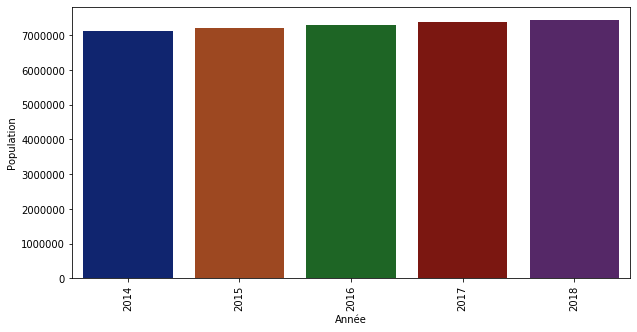

In [148]:
plt.rcParams['figure.figsize'] = (10, 5)
ax = sns.barplot(x = 'Année', y = 'Valeur', data=pop_for, palette = 'dark')
ax.set_xlabel(xlabel = 'Année', fontsize = 10)
ax.set_ylabel(ylabel = 'Population', fontsize = 10)
plt.xticks(rotation = 90)
plt.show()

In [149]:
pop_for

,Année,Valeur
0,2014,7131485
1,2015,7212776
2,2016,7293574
3,2017,7373798
4,2018,7453133


In [150]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import re
import json
import warnings
warnings.filterwarnings("ignore")

In [152]:
x = pop_for.iloc[:, 0].values.reshape(-1, 1)
y = pop_for.iloc[:, 1].values.reshape(-1, 1)
model = LinearRegression().fit(x, y)
y_pred = model.predict([[2050]])
y_pred

array([[10027634.39999998]])

# En 2025, la population sera de 10 millions d'habitants